In [121]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from lightgbm import LGBMClassifier
from fairlearn.metrics import (
    MetricFrame,
    false_positive_rate,
    true_positive_rate,
    selection_rate,
    count
)
from fairlearn.reductions import ExponentiatedGradient, DemographicParity
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data',header=None)

In [122]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [123]:
 # add headers to the data frames
headers = {0 : "age",
               1 : "sex",
               2 : "chest_pain_type",
               3 : "trestbps",
               4 : "chol",
               5 : "fasting_blood_sugar",
               6 : "rest_ecg",
               7 : "thalach",
               8 : "exercise_induced_angina",
               9 : "oldpeak",
               10 : "slope",
               11 : "vessels_colored_by_flourosopy",
               12 : "thalassemia",
               13 : "diagnosis"}
df = df.rename(columns=headers)


In [124]:
df["sex"].replace({1.0: "Male", 0.0: "Female"},inplace=True)

In [130]:
df["target"]=df["diagnosis"].apply(lambda x: 0 if x == 0  else 1)
df.drop(columns="diagnosis",inplace=True)

In [131]:
df["target"].value_counts()

0    164
1    139
Name: target, dtype: int64

In [132]:
#One-Hot Encode the categorical features
df = pd.get_dummies(df, columns = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg','exercise_induced_angina', 'slope', 'vessels_colored_by_flourosopy', 'thalassemia'],drop_first = True )

In [133]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis = 1), df['target'], train_size = 0.7, random_state = 42,stratify = df['target'] )

In [134]:
clf = LGBMClassifier()
clf.fit(X_train, y_train)

LGBMClassifier()

In [135]:
X_train

,age,trestbps,chol,thalach,oldpeak,sex_Male,chest_pain_type_2.0,chest_pain_type_3.0,chest_pain_type_4.0,fasting_blood_sugar_1.0,...,exercise_induced_angina_1.0,slope_2.0,slope_3.0,vessels_colored_by_flourosopy_1.0,vessels_colored_by_flourosopy_2.0,vessels_colored_by_flourosopy_3.0,vessels_colored_by_flourosopy_?,thalassemia_6.0,thalassemia_7.0,thalassemia_?
230,52.0,136.0,196.0,169.0,0.1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
43,59.0,150.0,212.0,157.0,1.6,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
283,35.0,122.0,192.0,174.0,0.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
206,58.0,128.0,259.0,130.0,3.0,1,0,0,1,0,...,1,1,0,0,1,0,0,0,1,0
42,71.0,160.0,302.0,162.0,0.4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,71.0,110.0,265.0,130.0,0.0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
173,62.0,140.0,394.0,157.0,1.2,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
55,54.0,124.0,266.0,109.0,2.2,1,0,0,1,0,...,1,1,0,1,0,0,0,0,1,0
91,62.0,160.0,164.0,145.0,6.2,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0


In [137]:
sensitive_feat = X_test['sex_Male']


In [138]:
y_pred = clf.predict(X_test)


In [139]:
gm = MetricFrame(metrics=recall_score, y_true=y_test, y_pred=y_pred, sensitive_features=sensitive_feat)
print(gm.by_group)


sex_Male
0    0.727273
1    0.709677
Name: recall_score, dtype: float64


We could also look at another metric, such as selection rate (the percentage of the population with ‘1’ as their label).



In [140]:
sr = MetricFrame(metrics=selection_rate, y_true=y_test, y_pred=y_pred, sensitive_features=sensitive_feat)
sr.by_group

sex_Male
0    0.322581
1    0.483333
Name: selection_rate, dtype: float64

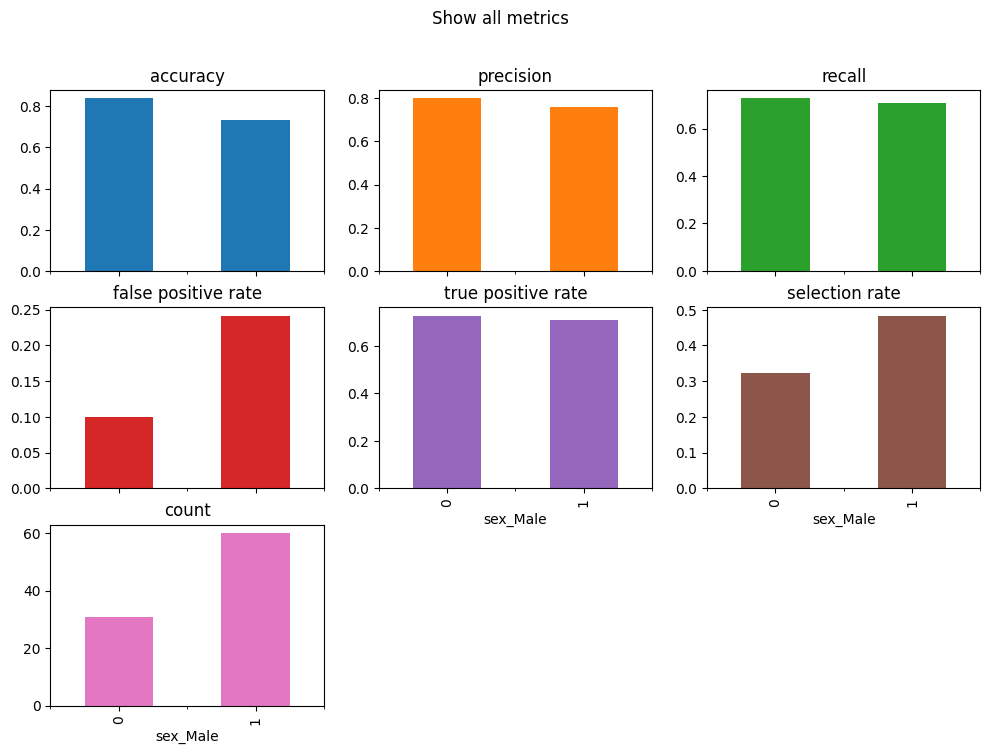

In [144]:
metrics = {
    'accuracy': accuracy_score,
    'precision': precision_score,
    'recall': recall_score,
    'false positive rate': false_positive_rate,
    'true positive rate': true_positive_rate,
    'selection rate': selection_rate,
    'count': count}
metric_frame = MetricFrame(metrics=metrics,
                           y_true=y_test,
                           y_pred=y_pred,
                           sensitive_features=sensitive_feat)
metric_frame.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    title="Show all metrics",
);

From the plot above, we can see that various metrics are slightly biased.

In [145]:
np.random.seed(42)
constraint = DemographicParity()
clf = LGBMClassifier()
mitigator = ExponentiatedGradient(clf, constraint)
sensitive_feat = X_train['sex_Male']
mitigator.fit(X_train, y_train, sensitive_features=sensitive_feat)

ExponentiatedGradient(constraints=<fairlearn.reductions._moments.utility_parity.DemographicParity object at 0x154b2fd60>,
                      estimator=LGBMClassifier(), nu=0.0)

In [146]:
sensitive_feat = X_test['sex_Male']
y_pred_mitigated = mitigator.predict(X_test)
sr_mitigated = MetricFrame(metrics=selection_rate, y_true=y_test, y_pred=y_pred_mitigated, sensitive_features=sensitive_feat)
print(sr_mitigated.by_group)

sex_Male
0    0.645161
1    0.500000
Name: selection_rate, dtype: float64
